In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [34]:
from google.colab import files
uploaded = files.upload()

In [35]:
AAPL = pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


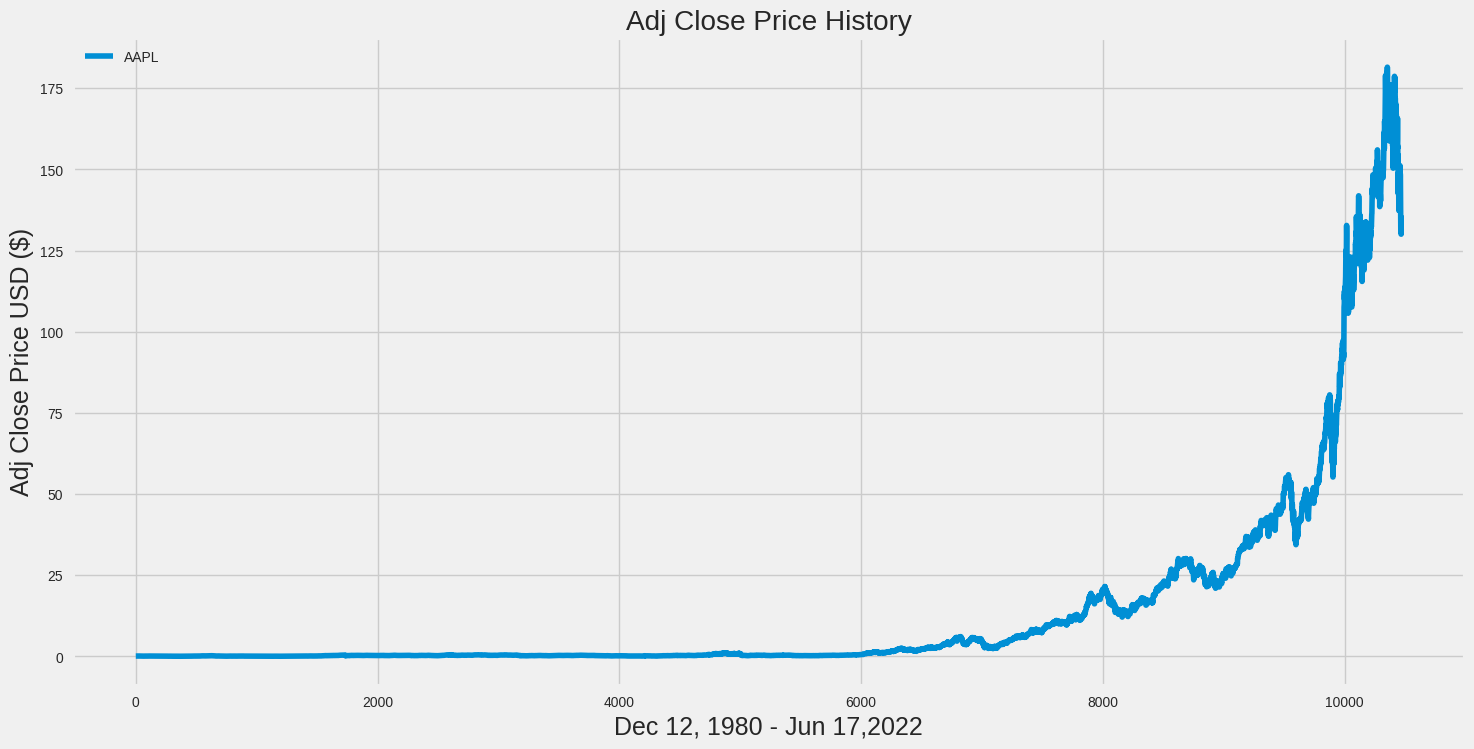

In [36]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.xlabel('Dec 12, 1980 - Jun 17,2022', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [37]:
#Create the simple moving average with 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
10463,147.195358
10464,146.363083
10465,145.569215
10466,144.378668


In [38]:
#Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
10463,160.740660
10464,160.427664
10465,160.162310
10466,159.851135


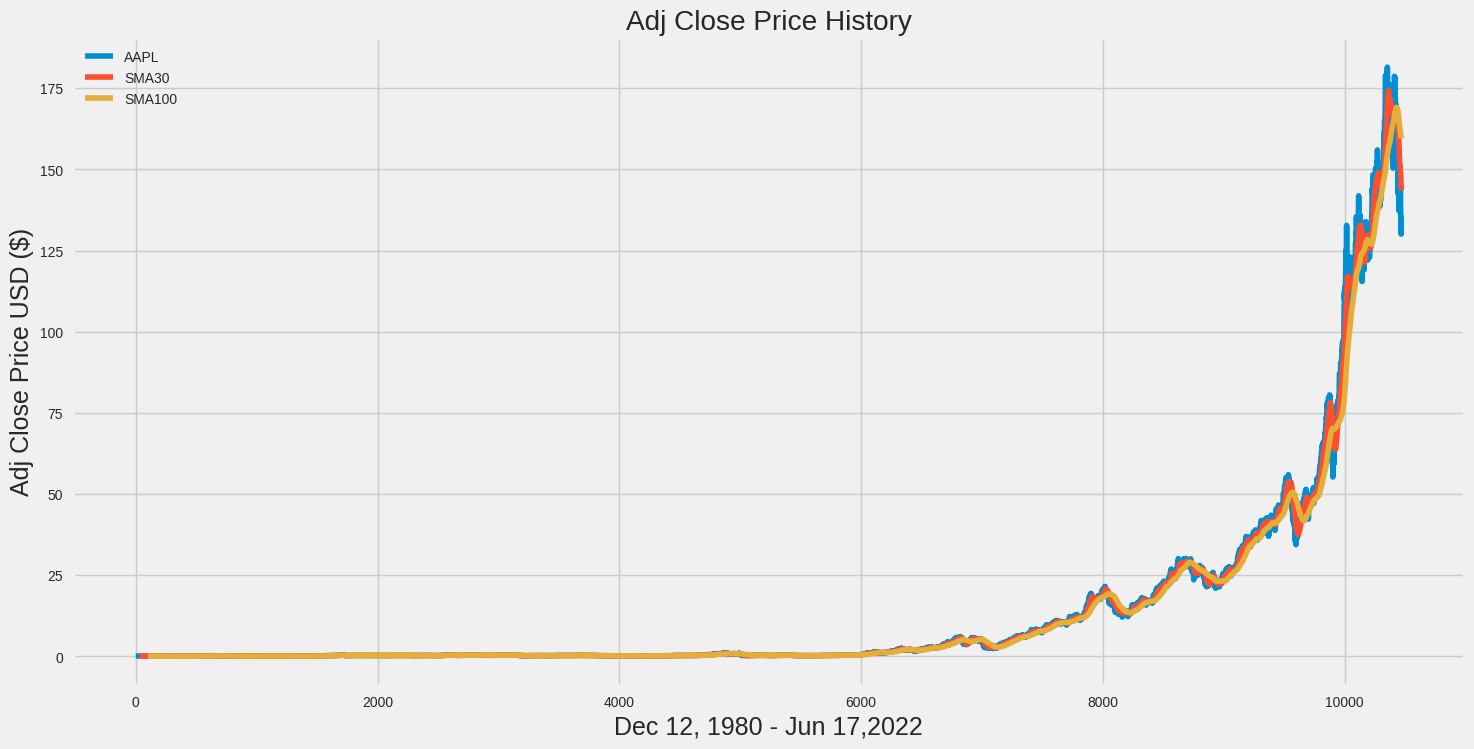

In [39]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.xlabel('Dec 12, 1980 - Jun 17,2022', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [40]:
data = pd.DataFrame()
data['AAPL']= AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data


,AAPL,SMA30,SMA100
0,0.100178,NaN,NaN
1,0.094952,NaN,NaN
2,0.087983,NaN,NaN
3,0.090160,NaN,NaN
4,0.092774,NaN,NaN
...,...,...,...
10463,131.880005,147.195358,160.740660
10464,132.759995,146.363083,160.427664
10465,135.429993,145.569215,160.162310
10466,130.059998,144.378668,159.851135


In [41]:
#Create a function when to buy and sell the stock
def buy_sell(data):
  sigPriceBuy = []
  sigPricesell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
  return (sigPriceBuy, sigPricesell)



In [42]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [43]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,0.100178,NaN,NaN,NaN,NaN
1,0.094952,NaN,NaN,NaN,NaN
2,0.087983,NaN,NaN,NaN,NaN
3,0.090160,NaN,NaN,NaN,NaN
4,0.092774,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10463,131.880005,147.195358,160.740660,NaN,NaN
10464,132.759995,146.363083,160.427664,NaN,NaN
10465,135.429993,145.569215,160.162310,NaN,NaN
10466,130.059998,144.378668,159.851135,NaN,NaN


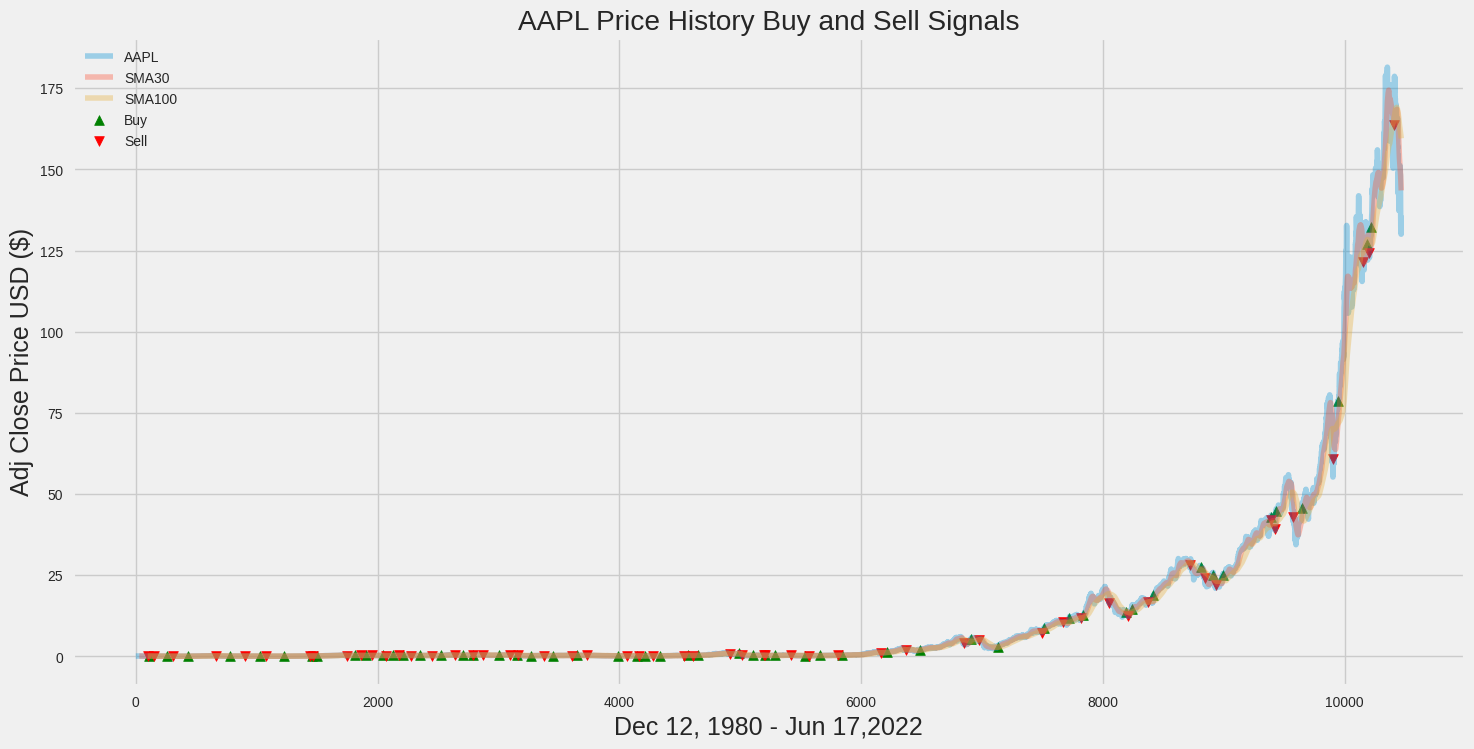

In [44]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(16,8))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('AAPL Price History Buy and Sell Signals')
plt.xlabel('Dec 12, 1980 - Jun 17,2022', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()
